# How can we add audio to the Gradio app?

We would like the ability to not only show people words and phrases in text, but also have it show how to pronounce the words.

## Step 1: We need to modify the `.gitattributes` file to let us upload audio files through commits and syncs.

The current settings for git with Hugging Face will not allow us to upload audio files.  
  
We will need to modify the `.gitattributes` file shown below by adding the following lines at the end of the file. This will let us upload `.wav` files, or `.mp3` files, I included that as well.

In [ ]:
*.wav filter=lfs diff=lfs merge=lfs -text
*.mp3 filter=lfs diff=lfs merge=lfs -text

Your end of the `.gitattributes` file should now look like this.  
  
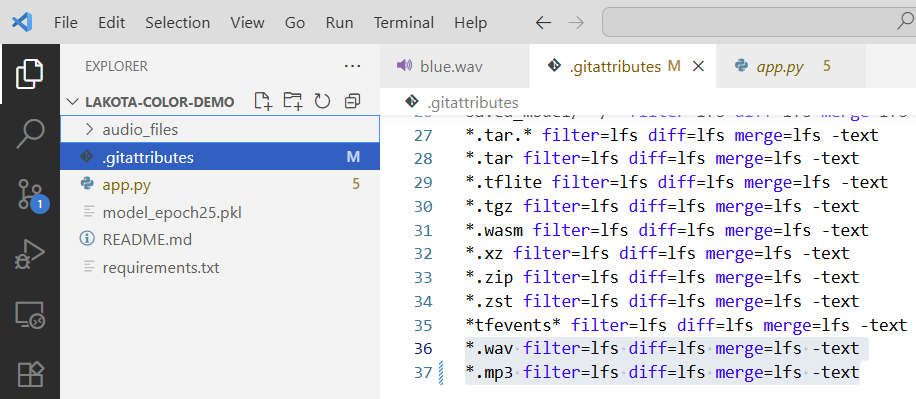

## Step 2: We need audio

These computers should have an audio recording application called `Sound Recorder`.  
Use this application to create short audio files with the words that you are using in your app.  
  
As you create your sample audio files, rename them to something that makes sense, like blue or tho for a file that plays "Tho".  
  
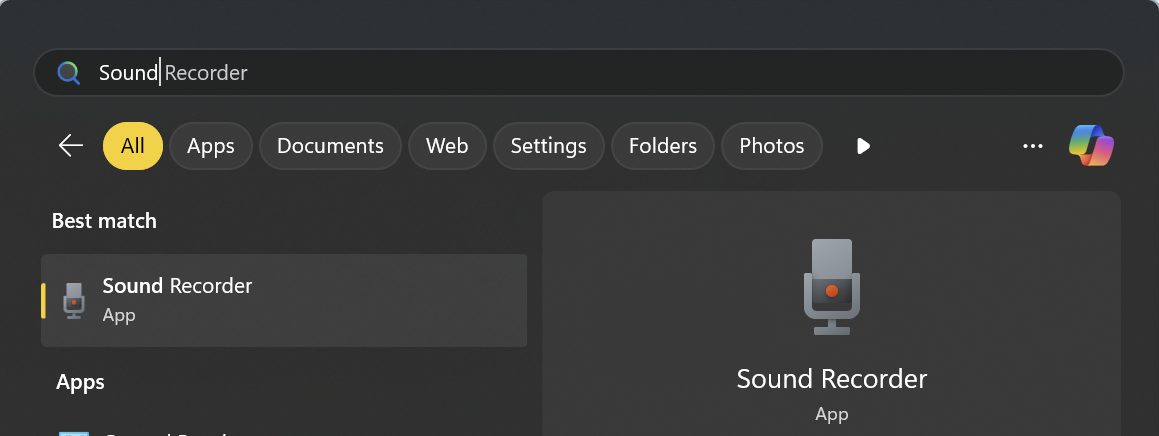

## Step 2: Create a placeholder for the audio files in our project
1. Create a folder called `audio_files` in our project through VS Code.  
    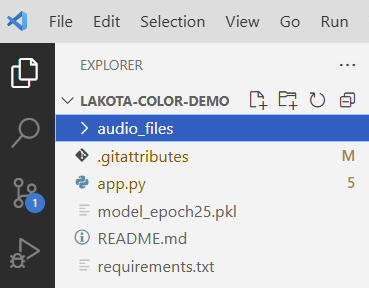
  
1. Find your files from `Sound Recorder` by right-clicking on the recording and select `Show in Explorer`.  
    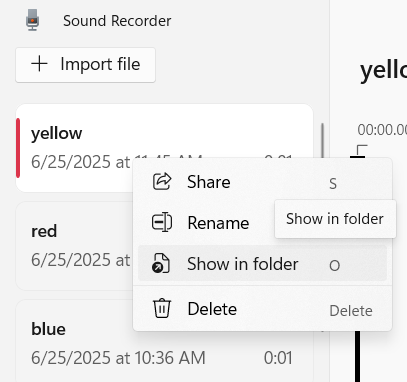  
      
1. Then drag those files into your new `audio_files` folder in VS Code. You should see something like the image below when successful.  
    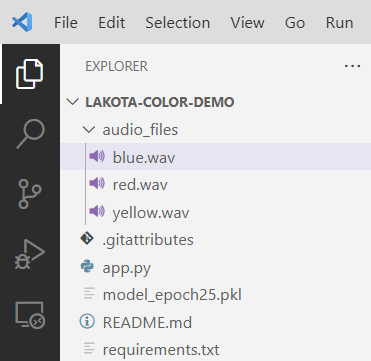

## Step 3: Verifying/modifying the dictionary

The base code for `app.py` already has an element for the audio files, but you will want to double check that the text in the dictionary matches the file names.

```
name_map = {
    "blue": {
        "lakota": "Tho",  
        "audio": "audio_files/blue.wav"
        },
    # Add other categories similarly...
}
```

## Step 3: Modifying the Gradio.Block user interface

1. Add the the sound variable that will refer to an audio block  
`lakota_sound = gr.Audio(editable=False, show_share_button=False, show_download_button=False)`

1. Modify the audio_input change event to use the sound as an output.  
```
audio_input.change(fn=classify_audio,
			inputs=audio_input,
			outputs=[prediction_text, confidence_text, lakota_text, lakota_sound])
```

In [ ]:
# Build the Gradio app
with gr.Blocks() as demo:
	with gr.Row():
		gr.Markdown("## 🎤 Record Audio and Predict a Color")

	with gr.Row():
		audio_input = gr.Audio(type="numpy", label="Recorded Audio", elem_id="audio_input", sources=["microphone"], interactive=True)
	
	with gr.Row():
		with gr.Column(scale=2):
			record_button = gr.Button("🎙️ Record Audio")
		with gr.Column(scale=1):
			clear_button = gr.Button("Clear Recording")
	
	with gr.Row():
		with gr.Column(scale=1):
			prediction_text = gr.Textbox(label="Prediction", interactive=False)
		with gr.Column(scale=1):
			confidence_text = gr.Textbox(label="Confidence", interactive=False)
		with gr.Column(scale=1):
			lakota_text = gr.Textbox(label="Lakota", interactive=False)

	with gr.Row():
		# JS-based button for auto-recording and clearing recording
		record_button.click(fn=noop, js=record_js, outputs=[])
		clear_button.click(fn=noop, js=clear_js, outputs=[])
		lakota_sound = gr.Audio(editable=False, show_share_button=False, show_download_button=False)

	# Audio input triggers prediction
	audio_input.change(fn=classify_audio,
						 inputs=audio_input,
						 outputs=[prediction_text, confidence_text, lakota_text, lakota_sound])

demo.launch()

## Step 4: Modifying classify_audio function

Return that `audio_file` element from the `category_map` element that the model returned.  
  
    `return f"Predicted Category: {pred_class}", f"Confidence: {prob:.2%}", f"Lakota: {category_map[pred_class]['lakota']}", category_map[pred_class]['audio']`


In [ ]:
# Classification function
def classify_audio(audio):
	if audio is None:
		return "No audio provided", "", ""
	sample_rate, audio_data = audio
	image = audio_to_melspectrogram_image(audio_data, sample_rate)
	pred_class, pred_idx, probs = model.predict(image)
	prob = probs[pred_idx].item()
	return f"Predicted Category: {pred_class}", f"Confidence: {prob:.2%}", f"Lakota: {category_map[pred_class]['lakota']}", category_map[pred_class]['audio']
